In [22]:
import warnings
from datetime import timedelta
import numpy as np
import pandas as pd
import xarray as xr

In [23]:
dir_sai = 'C:/Users/Heather/Documents/senior_research/data/'

d1 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d2 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d3 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d4 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d5 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d6 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d7 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d8 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d9 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'
d10 = 'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'

In [24]:
ensembles = ['001','002','003','004','005','006','007','008','009','010']
ens_files = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]

In [25]:
f_ts = '.cam.h0.TS.203501-20*12.nc'; var_ts = 'TS'

In [5]:
#ENSO SAI
q_ts = 'ts_temperature_arise/'

for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_sai+q_ts+j+i+f_ts, decode_cf=True)[var_ts]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    # nino34 (5N-5S, 170W-120W)
    ds = ds.sel(
        lon=slice(190, 240), 
        lat=slice(-5, 5)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    # save file
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/enso_ts_sai.'+i+'.'+var_ts+'.nc')

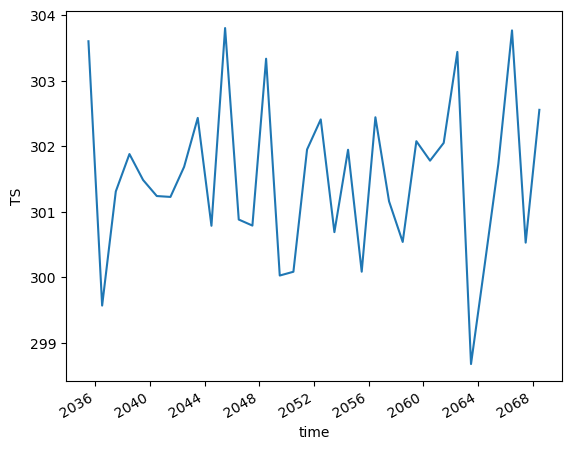

In [6]:
ds.plot()

In [28]:
#Alaska SAI
q_ts = 'ts_temperature_arise/'

for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_sai+q_ts+j+i+f_ts, decode_cf=True)[var_ts]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    # nino34 (5N-5S, 170W-120W)
    ds = ds.sel(
        lon=slice(196, 215), 
        lat=slice(60, 65)).mean('lat', skipna=True).mean('lon', skipna=True)

    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    # save file
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/ak_ts_sai.'+i+'.'+var_ts+'.nc')

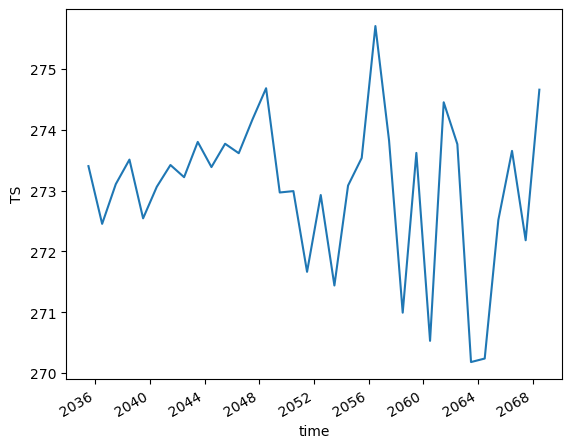

In [29]:
ds.plot()

 # ENSO SSP15-35, SSP35-69


In [30]:
d1_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d2_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d3_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d4_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d5_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d6_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d7_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d8_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d9_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'
d10_2 = 'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'

In [31]:
ensembles = ['001','002','003','004','005','006','007','008','009','010']
ens_files = [d1_2, d2_2, d3_2, d4_2, d5_2, d6_2, d7_2, d8_2, d9_2, d10_2]

In [32]:
#Current SSP15-35
f_ts_curr = '.cam.h0.TS.201501-206412.nc'; var_ts_curr = 'TS'
#Future SSP35-69
f_ts_fut = '.cam.h0.TS.206501-2*12.nc'; var_ts_fut = 'TS'

In [10]:
#Current SSP15-35 ENSO
file = 'waccm_temperature_ts/'
for i, j in zip(ensembles, ens_files):
    []
    # open file

    ds = xr.open_mfdataset(dir_sai+file+j+i+f_ts_curr, decode_cf=True)[var_ts_curr]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    # nino34 (5N-5S, 170W-120W)
    ds = ds.sel(
        lon=slice(190, 240), 
        lat=slice(-5, 5)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_curr.'+i+'.'+var_ts_curr+'.nc')

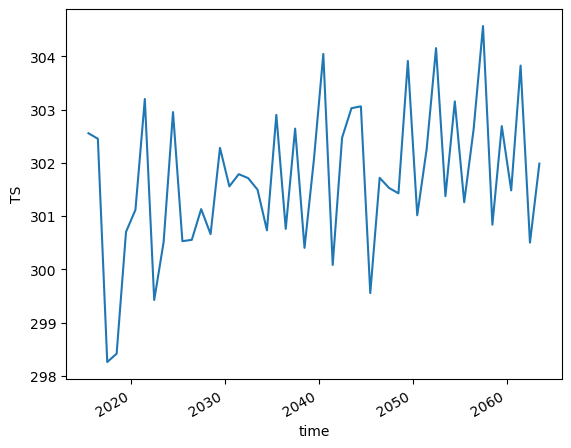

In [11]:
ds.plot() # sample

In [19]:
#Current SSP15-35 Alaska
file = 'waccm_temperature_ts/'
for i, j in zip(ensembles, ens_files):
    []
    # open file

    ds = xr.open_mfdataset(dir_sai+file+j+i+f_ts_curr, decode_cf=True)[var_ts_curr]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    # nino34 (5N-5S, 170W-120W)
    ds = ds.sel(
        lon=slice(196, 215), 
        lat=slice(60, 65)).mean('lat', skipna=True).mean('lon', skipna=True)
    #ds = ds.sel(
        #lon=slice(172.0, 162), 
        #lat=slice(48, 59.94)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_curr.'+i+'.'+var_ts_curr+'.nc')

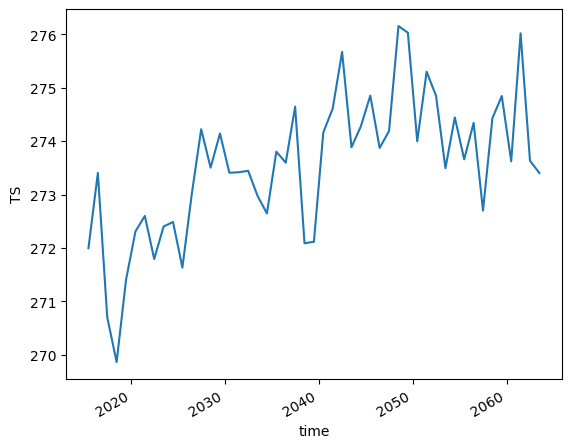

In [20]:
ds.plot()

In [37]:
##Future SSP35-69 ENSO
file = 'waccm_temperature_ts/'
for i, j in zip(ensembles, ens_files):
    
    # open file
    print(dir_sai+file+j+i+f_ts_fut)
    ds = xr.open_mfdataset(dir_sai+file+j+i+f_ts_fut, decode_cf=True)[var_ts_fut]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    # nino34 (5N-5S, 170W-120W)
    ds = ds.sel(
        lon=slice(190, 240), 
        lat=slice(-5, 5)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/enso_ssp_fut.'+i+'.'+var_ts_fut+'.nc')

C:/Users/Heather/Documents/senior_research/data/waccm_temperature_ts/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.001.cam.h0.TS.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/waccm_temperature_ts/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.002.cam.h0.TS.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/waccm_temperature_ts/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.003.cam.h0.TS.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/waccm_temperature_ts/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.004.cam.h0.TS.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/waccm_temperature_ts/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.005.cam.h0.TS.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/waccm_temperature_ts/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.cam.h0.TS.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/waccm_temperature_ts/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.

In [33]:
##Future SSP35-69 Alaska
file = 'waccm_temperature_ts/'
for i, j in zip(ensembles, ens_files):
    
    # open file
    ds = xr.open_mfdataset(dir_sai+file+j+i+f_ts_fut, decode_cf=True)[var_ts_fut]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    # nino34 (5N-5S, 170W-120W)
    ds = ds.sel(
        lon=slice(196, 215), 
        lat=slice(60, 65)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/ak_ssp_fut.'+i+'.'+var_ts_fut+'.nc')

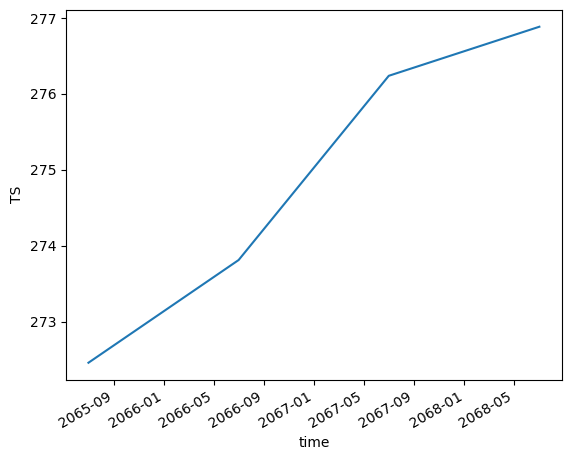

In [34]:
ds.plot()

# U-Wind

In [72]:
file = 'ARISE-U-files/'

In [73]:
ds = xr.open_mfdataset(
    'C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/'+\
    'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.001.cam.h0.U.203501-206912.nc')

In [74]:
ds = xr.Dataset(
    {
        "U": (("time","lev","lat","lon"), ds["U"].data),
    },
    coords={
        "time": ds.coords["time"].data, 
        "lev": ds["lev"].data,
        "lat": ds.coords["lat"].data, 
        "lon": ds.coords["lon"].data
    },
)

ds["U"]

<xarray.DataArray 'U' (time: 420, lev: 1, lat: 192, lon: 288)>
dask.array<open_dataset-879ee1c3a5b0b5d189999a7006992506U, shape=(420, 1, 192, 288), dtype=float32, chunksize=(420, 1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2035-02-01 00:00:00 ... 2070-01-01 00:00:00
  * lev      (lev) float32 200.0
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [75]:
dp = xr.open_mfdataset('C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.009.cam.h0.U.201501-206412.nc')

In [61]:
dp

<xarray.Dataset>
Dimensions:  (time: 600, lat: 192, lon: 288, ncl3: 1, ncl4: 600, ncl5: 1, ncl6: 192, ncl7: 288)
Coordinates:
  * time     (time) object 2015-02-01 00:00:00 ... 2065-01-01 00:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: ncl3, ncl4, ncl5, ncl6, ncl7
Data variables:
    lev      (ncl3) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    U        (ncl4, ncl5, ncl6, ncl7) float32 dask.array<chunksize=(600, 1, 192, 288), meta=np.ndarray>

In [76]:
ensembles = ['001','002','003','004','005','006','007','008','009','010']
ens_files = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]

In [77]:
f_u_sai = '.cam.h0.U.203501-20*12.nc'; var_u_sai = 'U'
f_u_curr = '.cam.h0.U.201501-206412.nc'; var_u_curr = 'U'
f_u_fut = '.cam.h0.U.206501-2*12.nc'; var_u_fut = 'U'

In [78]:
for i, j in zip(ensembles, ens_files):
    
    # open file
    print(dir_sai+file+j+i+f_u_sai)
    ds = xr.open_mfdataset(dir_sai+file+j+i+f_u_sai, decode_cf=True)[var_u_sai]
    

C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.001.cam.h0.U.203501-20*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.002.cam.h0.U.203501-20*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.003.cam.h0.U.203501-20*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.004.cam.h0.U.203501-20*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.005.cam.h0.U.203501-20*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.cam.h0.U.203501-20*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.007.cam.h0.U.203501-20*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U

In [79]:
#U-Wind SAI
#Good
for i, j in zip(ensembles, ens_files):
    
    # open file

    ds = xr.open_mfdataset(dir_sai+file+j+i+f_u_sai, decode_cf=True)
    ds = xr.Dataset(
        {
            "U": (("time","lev","lat","lon"), ds["U"].data),
        },
        coords={
            "time": ds.coords["time"].data, 
            "lev": ds["lev"].data,
            "lat": ds.coords["lat"].data, 
            "lon": ds.coords["lon"].data
        },
    )

    ds["U"]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(188, 198), 
        lat=slice(48, 60)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/jet_ak_sai.'+i+'.'+var_u_sai+'.nc')

In [68]:
ds.plot.scatter()


ValueError: x must be one of (lev, U, time)

In [80]:
ensembles = ['001','002','003','004','005','006','007','008','009','010']
ens_files = [d1_2, d2_2, d3_2, d4_2, d5_2, d6_2, d7_2, d8_2, d9_2, d10_2]

In [81]:
#U-Wind Current
#Good
for i, j in zip(ensembles, ens_files):
    print(dir_sai+file+j+i+f_u_curr)
    
    # open file

    ds = xr.open_mfdataset(dir_sai+file+j+i+f_u_curr, decode_cf=True)
    ds = xr.Dataset(
        {
            "U": (("time","lev","lat","lon"), ds["U"].data),
        },
        coords={
            "time": ds.coords["time"].data, 
            "lev": ds["lev"].data,
            "lat": ds.coords["lat"].data, 
            "lon": ds.coords["lon"].data
        },
    )

    ds["U"]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(188, 198), 
        lat=slice(48, 60)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/jet_ak_curr.'+i+'.'+var_u_curr+'.nc')

C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.001.cam.h0.U.201501-206412.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.002.cam.h0.U.201501-206412.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.003.cam.h0.U.201501-206412.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.004.cam.h0.U.201501-206412.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.005.cam.h0.U.201501-206412.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.cam.h0.U.201501-206412.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007.cam.h0.U.201501-206412.nc
C:/Users/Heat

In [71]:
ds.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [82]:
#U-Wind Future
#Two files missing
for i, j in zip(ensembles, ens_files):
    
    # open file
    print(dir_sai+file+j+i+f_u_fut)
    ds = xr.open_mfdataset(dir_sai+file+j+i+f_u_fut, decode_cf=True)
    ds = xr.Dataset(
        {
            "U": (("time","lev","lat","lon"), ds["U"].data),
        },
        coords={
            "time": ds.coords["time"].data, 
            "lev": ds["lev"].data,
            "lat": ds.coords["lat"].data, 
            "lon": ds.coords["lon"].data
        },
    )

    ds["U"]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(188, 198), 
        lat=slice(48, 60)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/jet_ak_fut.'+i+'.'+var_u_fut+'.nc')

C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.001.cam.h0.U.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.002.cam.h0.U.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.003.cam.h0.U.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.004.cam.h0.U.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.005.cam.h0.U.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.cam.h0.U.206501-2*12.nc
C:/Users/Heather/Documents/senior_research/data/ARISE-U-files/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007.cam.h0.U.206501-2*12.nc
C:/Users/Heather/Documents/

In [23]:
#DONT WORRY ABOUT PRECIPITATION
"""
file = 'waccm_precipitation_prect/'
for i, j in zip(ensembles, ens_files):
    
    # open file

    ds = xr.open_mfdataset(dir_sai+file+j+i+f_prect, decode_cf=True)[var_prect]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        # center the month because the bounds are given first
        # convert cftime to datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(231.5625, 244.6875), 
        lat=slice(34.28515, 39.99935)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/enso_prect_ssp.'+i+'.'+var_prect+'.nc')
    """

In [56]:
#DONT WORRY ABOUT PRECIPITATION
"""q = 'prect_precipitation_arise/'

for i, j in zip(ensembles, ens_files):
#for i, j in zip(ens_files, ensembles): ##trying to change the order to see if that changed anything
    
    # open file
    #ds = xr.open_mfdataset(dir_sai+j+i+f_psl, decode_cf=True)[var_psl]
    ds = xr.open_mfdataset(dir_sai+q+j+i+f_prect, decode_cf=True)[var_prect]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        # convert cftime to datetime 
        # center the month because the bounds are given first
        ds['time'] = ds.indexes['time'].to_datetimeindex() - timedelta(days=15)
    
    # slice and create time series
    ds = ds.sel(
        lon=slice(221.25, 238.75), 
        lat=slice(28.75, 38.75)).mean('lat', skipna=True).mean('lon', skipna=True)
    
    # only want JUN-JUL
    ds = ds.isel(time=slice(6,-6))
    
    # take DJF means for each year after dropping first Jan/Feb and last solo Dec
    ds = ds.resample(time='AS-JUL').mean(skipna=True)
    
    # save file
    ds.to_netcdf('C:/Users/Heather/Documents/senior_research/alaska/ak_jet_sai.'+i+'.'+var_prect+'.nc')
    """